In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('train_boston.csv')
df1.head()

,index,id,data,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6243,8850000509,9/23/14,2,1.50,1620,1444,2.0,0,0,...,1080,540,2007,0,98144,47.5892,-122.309,1660,1642,525000
1,8986,191100410,6/20/14,3,2.75,2470,10125,2.0,0,0,...,2470,0,1960,2012,98040,47.5651,-122.223,2290,10125,970500
2,9419,6632300040,4/25/15,2,1.00,1140,7435,1.0,0,0,...,1140,0,1952,1990,98125,47.7300,-122.310,1320,9385,327000
3,10155,7517500310,5/6/15,3,1.00,1460,6198,1.5,0,0,...,1460,0,1916,0,98107,47.6626,-122.361,2280,5160,775000
4,10436,7454000990,9/24/14,2,1.00,670,6720,1.0,0,0,...,670,0,1942,0,98126,47.5151,-122.372,710,6720,304950


In [3]:
df1.columns = [column.replace(' ','') for column in df1.columns]
df1.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [4]:
#dropping useless columns
df1 = df1.drop(['index','lat','lon', 'id'], axis=1)

In [5]:
nulls = pd.DataFrame(df1.isna().sum()*100/len(df1), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
data,0.0
bedrooms,0.0
sqft_lot15,0.0
sqft_living15,0.0
zip_code,0.0
yr_renovated,0.0
yr_built,0.0
sqft_basement,0.0
sqft_above,0.0
grade,0.0


In [6]:
df1.dtypes

data              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zip_code           int64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [7]:
#changing data types because...
df1[['bathrooms','bedrooms','view','waterfront','floors','condition','grade','zip_code']] = df1[['bathrooms','bedrooms','view','waterfront','floors','condition','grade','zip_code']].astype('object')

In [8]:
df1['data']= pd.to_datetime(df1['data'])

In [9]:
df1.dtypes

data             datetime64[ns]
bedrooms                 object
bathrooms                object
sqft_living               int64
sqft_lot                  int64
floors                   object
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zip_code                 object
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [10]:
df1.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.705890
sqft_above       0.607706
sqft_living15    0.585543
sqft_basement    0.331291
yr_renovated     0.128425
sqft_lot         0.092304
sqft_lot15       0.089045
yr_built         0.053602
Name: price, dtype: float64

In [11]:
'''def years(x):
    if x['yr_renovated'] == 0:
        return x['data']-x['yr_built']
    else:
        return x['data']-x['yr_renovated']
df1['yrs_until_sold']=df1.apply(years, axis=1)
df1'''

"def years(x):\n    if x['yr_renovated'] == 0:\n        return x['data']-x['yr_built']\n    else:\n        return x['data']-x['yr_renovated']\ndf1['yrs_until_sold']=df1.apply(years, axis=1)\ndf1"

# EDA

In [12]:
df1.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,17276.000000,1.727600e+04,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,1.727600e+04
mean,2084.123177,1.508619e+04,1791.053542,293.069634,1971.201783,83.881223,1988.115825,12648.988307,5.408807e+05
std,924.621058,4.147208e+04,830.925292,445.900684,29.340613,400.517491,687.864331,25805.732442,3.732611e+05
min,370.000000,5.200000e+02,370.000000,0.000000,1900.000000,0.000000,460.000000,651.000000,8.000000e+04
25%,1420.000000,5.030000e+03,1190.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000,3.210202e+05
50%,1920.000000,7.599000e+03,1570.000000,0.000000,1975.000000,0.000000,1840.000000,7614.000000,4.500000e+05
75%,2556.250000,1.069850e+04,2220.000000,560.000000,1997.000000,0.000000,2360.000000,10093.250000,6.442125e+05
max,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,560617.000000,7.700000e+06


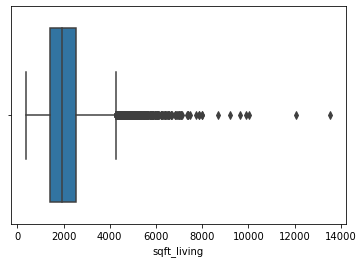

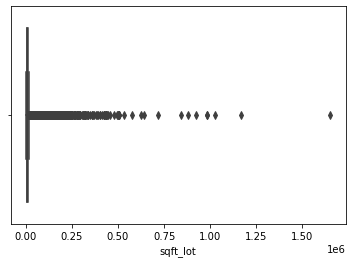

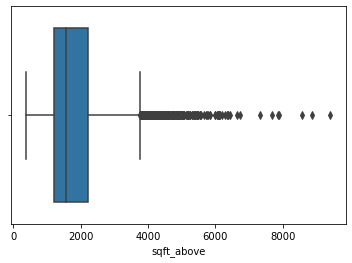

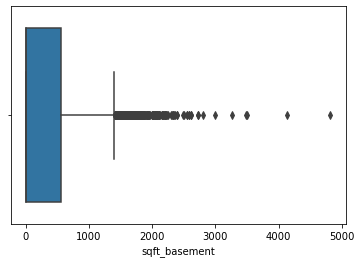

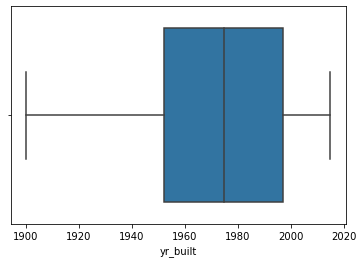

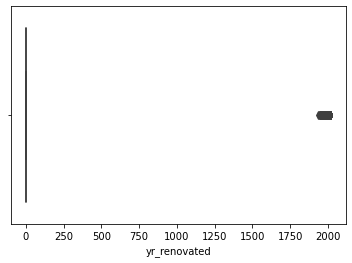

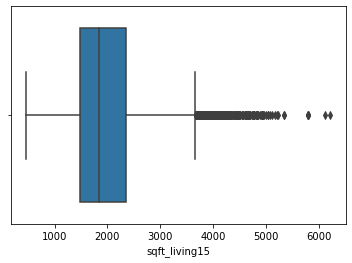

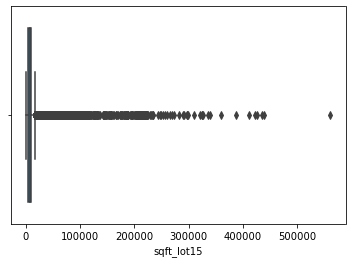

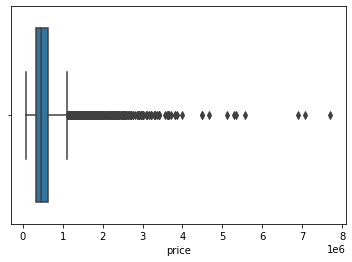

In [13]:
for column in df1.select_dtypes(np.number).columns:
    sns.boxplot(df1[column])
    plt.show()

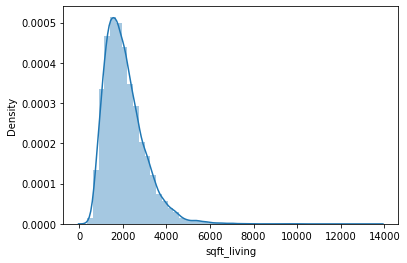

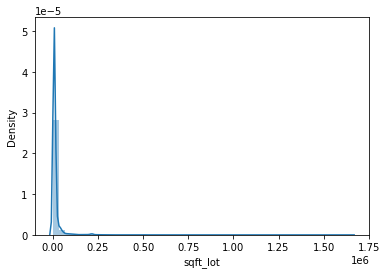

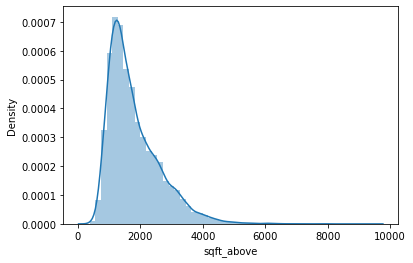

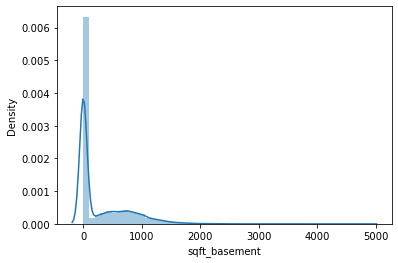

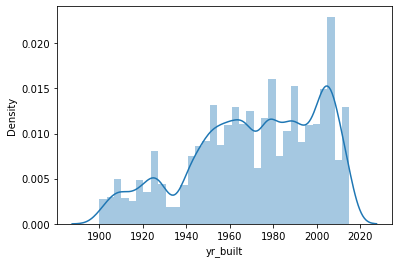

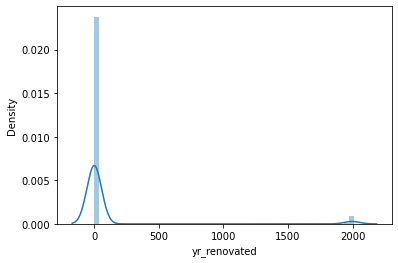

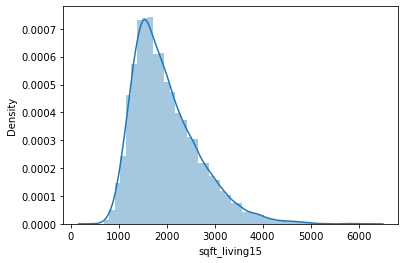

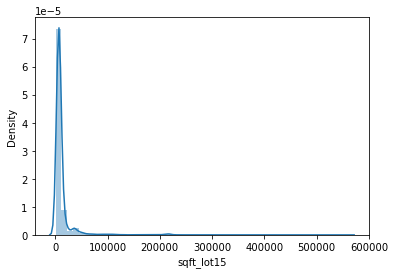

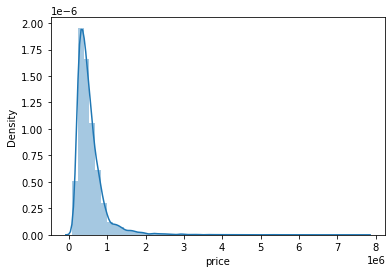

In [14]:
for column in df1.select_dtypes(np.number).columns:
    sns.distplot(df1[column])
    plt.show()

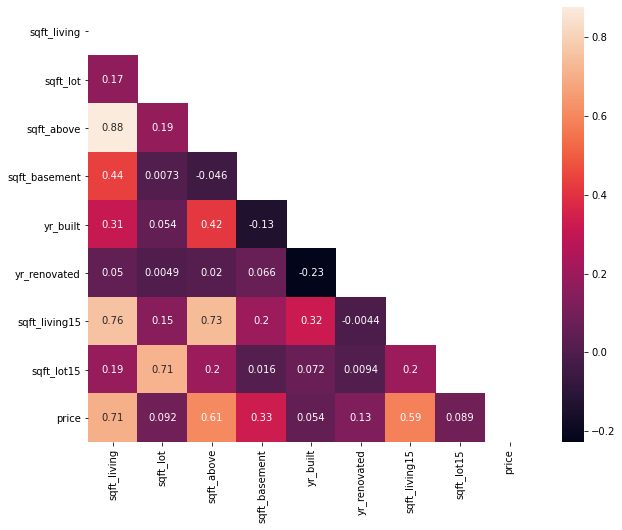

In [15]:
# check the correlations
mask = np.zeros_like(df1.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df1.corr(), mask=mask, annot=True)
plt.show()

# Dummifying

In [16]:
df2 = df1.copy()
df2 = pd.get_dummies(df1, drop_first=True)
df2

,data,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,...,zip_code_98146,zip_code_98148,zip_code_98155,zip_code_98166,zip_code_98168,zip_code_98177,zip_code_98178,zip_code_98188,zip_code_98198,zip_code_98199
0,2014-09-23,1620,1444,1080,540,2007,0,1660,1642,525000,...,0,0,0,0,0,0,0,0,0,0
1,2014-06-20,2470,10125,2470,0,1960,2012,2290,10125,970500,...,0,0,0,0,0,0,0,0,0,0
2,2015-04-25,1140,7435,1140,0,1952,1990,1320,9385,327000,...,0,0,0,0,0,0,0,0,0,0
3,2015-05-06,1460,6198,1460,0,1916,0,2280,5160,775000,...,0,0,0,0,0,0,0,0,0,0
4,2014-09-24,670,6720,670,0,1942,0,710,6720,304950,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,2014-12-03,1810,7523,1170,640,1962,1980,2090,7523,501000,...,0,0,0,0,0,0,0,0,0,0
17272,2015-04-16,1190,1200,1190,0,2008,0,1180,1224,475000,...,0,0,0,0,0,0,0,0,0,0
17273,2014-05-05,2920,5000,2780,140,1908,0,2020,5000,823000,...,0,0,0,0,0,0,0,0,0,0
17274,2015-05-08,910,5212,910,0,1951,0,1520,6300,565000,...,0,0,0,0,0,0,0,0,0,0


# Dealing with outliers

# Feature scaling

# ML model - LR

In [17]:
#splitting our data
X = df2.drop(['price','data'], axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [26]:
print('The R2_score is',r2_score(y_test, predictions))
print ('The mean_absolute_error is', mean_absolute_error(y_test, predictions))
print('The mean_squared error is', mean_squared_error(y_test, predictions, squared=False))

The R2_score is 0.8018311089236285
The mean_absolute_error is 91709.68440994043
The mean_squared error is 171781.45476986503


<AxesSubplot:ylabel='price'>

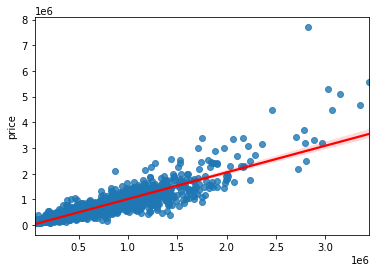

In [27]:
sns.regplot(predictions, y_test, line_kws={'color': 'red'})

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
knn.score(X_test, y_test)

0.4809988949642896